# <font color='blue'> Lecture 2: Probability distributions </font>


In this lecture, I will provide several popular probability distribution.

In [1]:
# My matplotlib adjustments!

import matplotlib
params = {
	'axes.labelsize': 30,
	'font.size': 28,
	'legend.fontsize': 26,
	'xtick.labelsize': 28,
	'ytick.labelsize': 28,
	'lines.linewidth': 2,
	'text.usetex': False,
	# 'figure.autolayout': True,
	'ytick.right': True,
	'xtick.top': True,

	'figure.figsize': [10, 8], # instead of 4.5, 4.5
	'axes.linewidth': 2.5,

	'xtick.major.size': 24,
	'ytick.major.size': 24,
	'xtick.minor.size': 24,
	'ytick.minor.size': 24,

	'xtick.major.width': 2.5,
	'ytick.major.width': 2.5,
	'xtick.minor.width': 2.5,
	'ytick.minor.width': 2.5,

	'xtick.major.pad': 10,
	'ytick.major.pad': 10,
	#'xtick.minor.pad': 14,
	#'ytick.minor.pad': 14,

	'xtick.direction': 'in',
	'ytick.direction': 'in',
   }
matplotlib.rcParams.update(params)

- **Random variable (rv)**: Values of outcomes of a random phenomenon. There are two types of random variables: discrete and continuous.

- **Discrete random variable**: Their values is in a discrete set. Discrete random variables are often a countable number.

- **Continuous random variable**: Their values in arbitrary ranges of real numbers. Continuous random variables are often measurements.

A probability distribution $P(x)$ is a function which assigns a probability for range of values / or the law of probability of variable.

- Continous variables $$\int_{-\infty}^\infty P(x) \, dx = 1 $$

- Discrete variables $$\sum_i P(x_i) = 1$$

-  Continuous random variable: $P(x)$ is also called **probability density function: PDF**

- If we know the probability function, it means we determine completely the random variable.

---
## 1. Binomial distribution

- A random process with two possible outcomes with probabilities ￼ (success) and 1-￼ (failure)

$$P_{Binomial}(n) = \frac{N!}{n! (N-n)!} \rho ^n (1- \rho)^{N-n}$$

- The mean: $$\overline{n} = \rho N$$
- The variance: $$Var(n) = N \rho \left( 1- \rho \right).$$

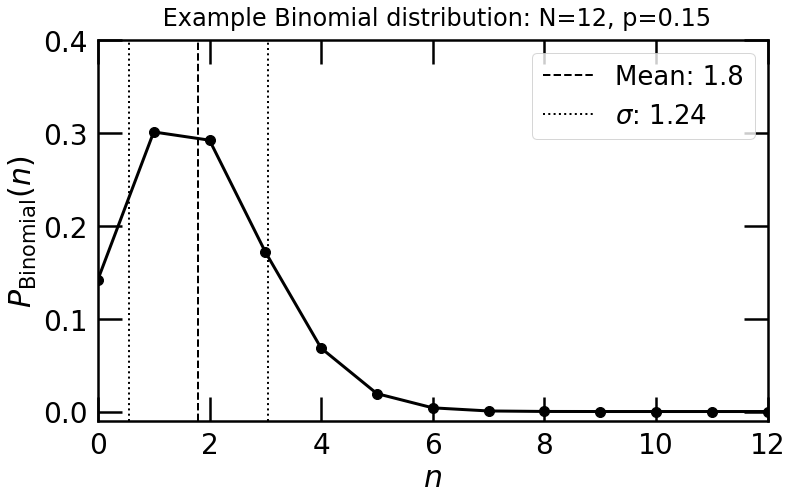

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# ---------------------------------------------------- 
N = 12                      # number of trials  / "you can change this number"
p = 0.15                    # probability of success in each trial


n = np.arange(N+1)                   # number of successes
pdf = stats.binom.pmf(n, N, p)       # generate Binomial probability mass function (pmf): function give values

mu = N*p                             # mean of the distribution
var = N*p*(1-p)                      # Variance 
sigma = np.sqrt(var)                 # Standard deviation

xmin,xmax = 0.,float(N)
ymin,ymax = -0.01,0.4

## _______________________________________________


fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(n,pdf, marker='o',markersize=10,color='black',lw=3)

ax.axvline(x = np.round(mu,2), color='black',linestyle='--', label='Mean: '+str(np.round(mu,2) ) )
ax.axvline(x = np.round(mu,2) - np.round(sigma,2), color='black',linestyle='dotted', label=r'$\sigma$: '+str(np.round(sigma,2) ) )
ax.axvline(x = np.round(mu,2) + np.round(sigma,2), color='black',linestyle='dotted' )


#ax.plot([mu,mu],[ymin,ymax],color='black',linestyle='dotted', label='Mean: '+str(np.round(mu,2) ) )

ax.legend()

ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$P_{\rm Binomial}(n)$')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_title(' Example Binomial distribution: N='+str(N)+', p='+str(p),fontsize=24,pad=15)

plt.savefig('PDF_Binomial.png',dpi=300)

In [3]:
stats.binom.pmf?

Signature: stats.binom.pmf(k, *args, **kwds)
Docstring:
Probability mass function at k of the given RV.

Parameters
----------
k : array_like
    Quantiles.
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    Location parameter (default=0).

Returns
-------
pmf : array_like
    Probability mass function evaluated at k
File:      /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method


---
## 2. Poisson distribution

- Process of counting something in an interval (of time)
- the Binomial distribution $\rho \rightarrow 0, \, N \rightarrow \infty $

$$P_{Poisson} (n) = \frac{\mu^n e^{-\mu}}{ n! }$$

- Mean and variance: $\overline{n} = Var(n) = \mu.$

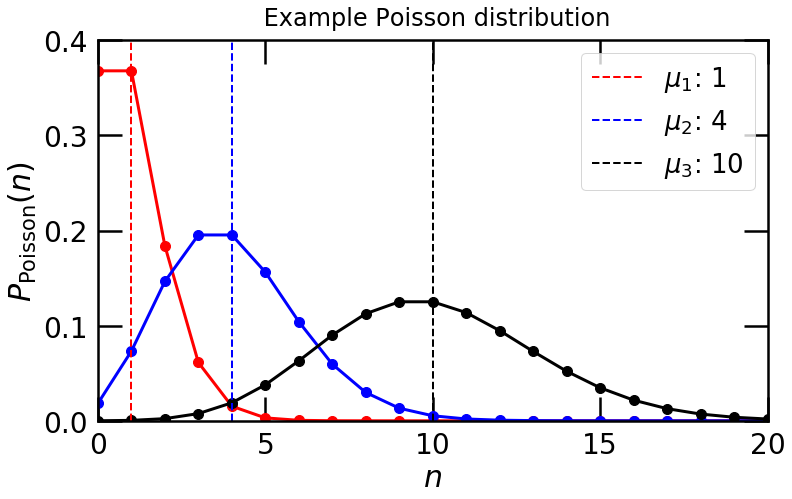

In [4]:
mu1 = 1            # mean number of events expected
mu2 = 4
mu3 = 10

nmax = 20                                    # maximum observed number of events to consider
n = np.arange(nmax+1)                        # variable for number of events
pdf_Poisson1 = stats.poisson.pmf(n,mu1)       # generate Poisson probability function
pdf_Poisson2 = stats.poisson.pmf(n,mu2)
pdf_Poisson3 = stats.poisson.pmf(n,mu3)

## ____________________________________________________

xmin,xmax = 0.,float(nmax)
ymin,ymax = 0.,0.4

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(n, pdf_Poisson1,marker='o',markersize=10,color='red',lw=3, )
ax.plot(n, pdf_Poisson2,marker='o',markersize=10,color='blue',lw=3)
ax.plot(n, pdf_Poisson3,marker='o',markersize=10,color='black',lw=3)

ax.axvline(x = np.round(mu1), color='red',linestyle='--', label=r'$\mu_1$: '+str(mu1) )   ## Vertical lines
ax.axvline(x = np.round(mu2), color='blue',linestyle='--', label=r'$\mu_2$: '+str(mu2) )
ax.axvline(x = np.round(mu3), color='black',linestyle='--', label=r'$\mu_3$: '+str(mu3) )

#plt.plot([mu,mu],[ymin,ymax],color='black',linestyle='dotted')

ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$P_{\rm Poisson}(n)$')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

ax.legend()
ax.set_title(' Example Poisson distribution',fontsize=24,pad=15)

plt.savefig('PDF_Poisson.png',dpi=300)

In [5]:
#stats.poisson.pmf?

---
## 3. Gaussian distribution

- This is a very important probability distribution

$$
f(x)=\frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{(x- \mu)^2}{2 \sigma^2}}\text{, where $x\in \mathbb{R}$}
$$

$
\text{Normal distribution notation} \\
$
$$
X \sim N(\mu,\sigma^2) \\
$$

- Mean: $\mu$
- standard deviation: $\sigma$

0.9999467937162005


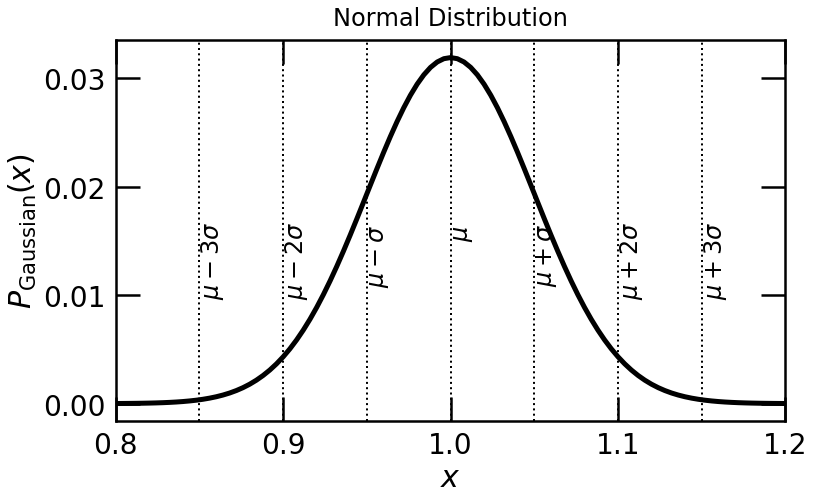

In [6]:
mu = 1.                        # mean
sigma = 0.05                   # standard deviation
xmin,xmax,nx = 0.8, 1.2, 101   # range of variable
ymin,ymax = 0., 0.1


x, dx = np.linspace(xmin, xmax, nx, retstep=True)         # values of variable, step is space between value dx for a very small sigma!
P = stats.norm.pdf(x, mu, sigma)   * dx                   # generate Gaussian probability distribution function (pdf); 
#P = stats.norm.pdf(x, loc=mu, scale=sigma)

print(np.sum(P))

## ======== Plot the distribution

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(x,P,color='black',lw=5)


### ======== lines, Labels mu, sigma
txt = [r'$\mu - 3 \sigma$',r'$\mu - 2\sigma$',r'$\mu - \sigma$',r' $\mu$',r'$\mu + \sigma$',r'$\mu + 2 \sigma$', r'$\mu + 3\sigma$']
for i in range(-3,4):   ## 3 sigma range
    #print(i+3)
    x1 = mu + i*sigma
    ax.axvline(x = x1, color='black',linestyle='dotted')
    ax.text(x1, 0.015,txt[i+3],rotation=90,fontsize=24)

    #plt.plot([x1,x1],[ymin,ymax],color='black',linestyle='dotted')

## ========= better visualization
plt.xlabel(r'$x$')
plt.ylabel(r'$P_{\rm Gaussian}(x)$')
plt.xlim(xmin,xmax)
plt.title('Normal Distribution',fontsize=24,pad=15)
#plt.ylim(ymin,ymax)

plt.savefig('PDF_Gaussian.png',dpi=300)

y1= 0.24197072451914337


Text(0.5,1,'N(0,1)')

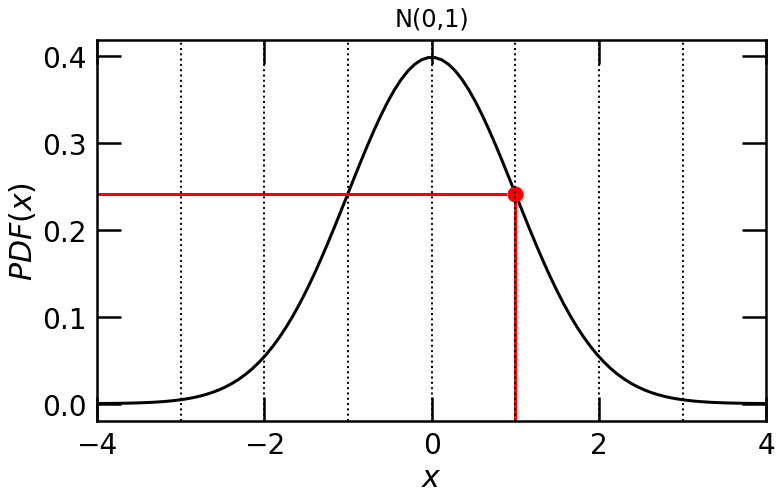

In [7]:
xmin,xmax, nx = -4,4,100
x = np.linspace(xmin,xmax,nx)
mu = 0
sigma =1.
x1 = 1.0

PDF = stats.norm.pdf(x, loc=mu, scale=sigma)
y1 = stats.norm.pdf(x=x1, loc=mu, scale=sigma)
print('y1=',y1)

## =================
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(x, PDF, color='black',lw=3)

ax.axhline(y= y1 ,xmax=0.61,color='r', lw=3)                         # horizontal line
ax.axvline(x=x1, ymax=0.58, color='r',lw=3)                          # vertical line
xplot = ax.plot([x1], [y1], marker='o', markersize=15, color="red")  # coordinate point

for i in range(-3,4):      # print \sigma line
    x1 = mu + i*sigma
    ax.axvline(x = x1, color='black',linestyle='dotted')


ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$PDF(x)$')

ax.set_xlim(xmin,xmax)

ax.set_title(r'N(0,1)',fontsize=24,pad=15)



In [8]:
#ax.axhline?

In [9]:
ppf = stats.norm.ppf(0.95, loc=mu, scale=sigma)          # percent point function is inverse of cdf. 
ppf

1.6448536269514722

In [10]:
stats.norm.pdf?

Signature: stats.norm.pdf(x, *args, **kwds)
Docstring:
Probability density function at x of the given RV.

Parameters
----------
x : array_like
    quantiles
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
pdf : ndarray
    Probability density function evaluated at x
File:      /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method


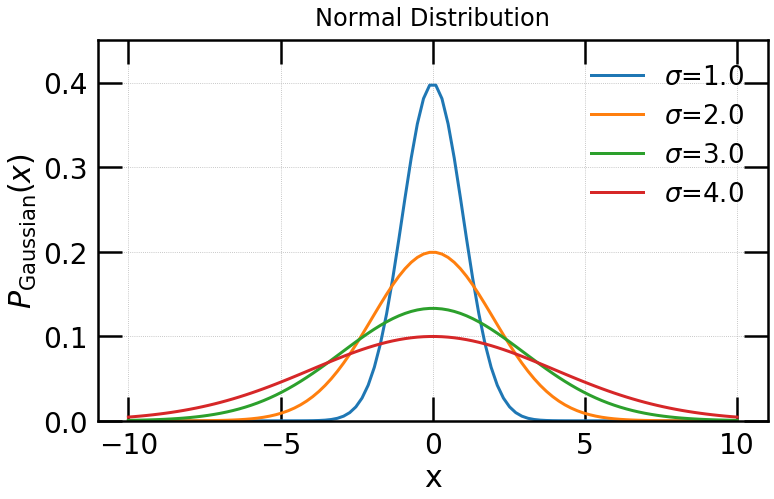

In [11]:
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]

fig, ax = plt.subplots(figsize=(12, 7))

for s in stdvs:
    ax.plot(x, stats.norm.pdf(x,loc=0, scale=s), label=r'$\sigma$=%.1f' % s, lw=3)
    
ax.set_xlabel('x')
ax.set_ylabel(r'$P_{\rm Gaussian}(x)$')
ax.set_title('Normal Distribution',fontsize=24,pad=15)
ax.legend(loc='best', frameon=False)
ax.set_ylim(0,0.45)
ax.grid(linestyle='dotted')

plt.savefig('PDF_Gaussian_sigmas.png',dpi=300)

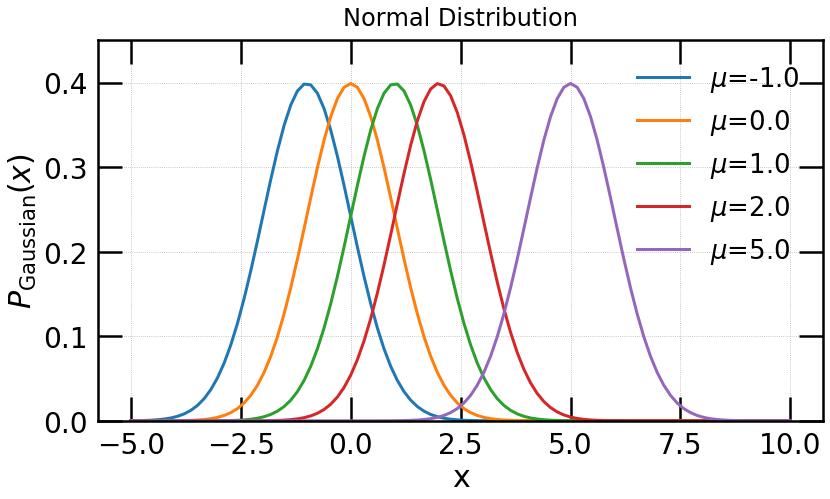

In [12]:
x = np.linspace(-5,10,100)
means = [-1., 0.0, 1.0, 2.0, 5.0]

fig, ax = plt.subplots(figsize=(13, 7))

for mean in means:
    ax.plot(x, stats.norm.pdf(x,loc=mean,scale=1.), label=r'$\mu$=%.1f' % mean, lw=3)
    
ax.set_xlabel('x')
ax.set_ylabel(r'$P_{\rm Gaussian}(x)$')
ax.set_title('Normal Distribution',fontsize=24,pad=15)
ax.legend(loc='best', frameon=False)
ax.set_ylim(0,0.45)
ax.grid(linestyle='dotted')

plt.savefig('PDF_Gaussian_means.png',dpi=300)

## Interval around the mean `norm.interval`

- For example the standard Normal distribution $$X \sim N(0,1^2).$$
A Normal distribution with a mean $\mu=0$ and a standard deviation $\sigma =1$. 
If we want to find 68-95-99.7% of the probability, `norm.interval` will return x values around the mean.

- Remember the matplotlib: `fill_between(x, y1, y2=0)` fill up the area between two curves `y1` and `y2` which has the default is 0.

-1.0000217133229992 1.0000217133229992
-2.0000024438996036 2.0000024438996027
-3.0356723666270784 3.0356723666270784


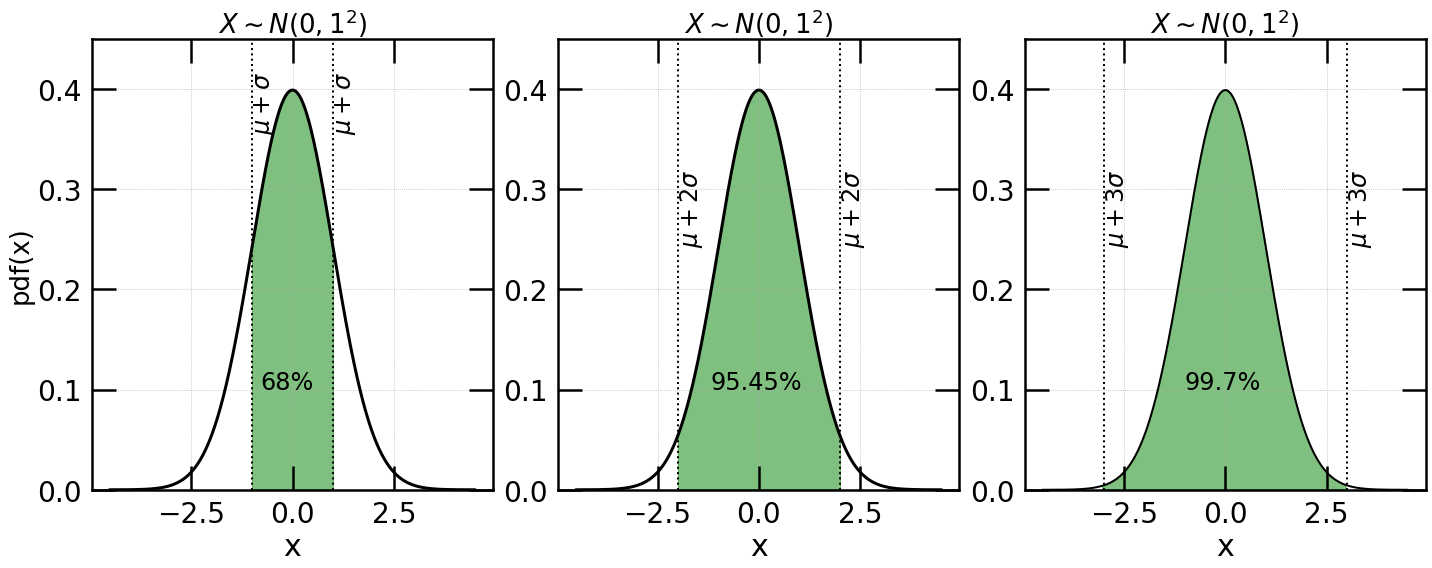

In [42]:
mu = 0.
sigma =1.

a,b = stats.norm.interval(alpha=0.6827, loc=mu, scale=sigma)
a1,b1 = stats.norm.interval(alpha=0.9545, loc=mu, scale=sigma)
a2,b2 = stats.norm.interval(alpha=0.9976, loc=mu, scale=sigma)

print(a,b)
print(a1,b1)
print(a2,b2)

px=np.arange(a,b,0.1)
px1=np.arange(a1,b1,0.1)
px2=np.arange(a2,b2,0.1)


x= np.arange(-4.5,4.5,0.01)
pdf = stats.norm.pdf(x)


### ===================== plot ===========
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
#fig.subplots_adjust(left=0.15, right=1.5, bottom=0.1, top=0.9);

### === First plot
ax[0].plot(x, pdf,'k',lw=3)

ax[0].set_title(r"$X \sim N(0,1^2)$",fontsize=26)
ax[0].set_xlabel('x')
ax[0].set_ylabel('pdf(x)',fontsize=26)
ax[0].grid(linestyle='dotted')

ax[0].set_ylim(0,0.45)
ax[0].fill_between(px,stats.norm.pdf(px), alpha=0.5, color='g')  # fill
ax[0].text(-0.8,0.1, "68%", fontsize=24)

x1 =mu+sigma
txt1 = r'$\mu + \sigma$'
ax[0].axvline(x = x1, color='black',linestyle='dotted')
ax[0].axvline(x = -x1, color='black',linestyle='dotted')
ax[0].text(x1, 0.4, txt1,rotation=90,fontsize=24)
ax[0].text(-x1, 0.4, txt1,rotation=90,fontsize=24)


### === Second plot
ax[1].plot(x, pdf,'k',lw=3)

ax[1].set_title(r"$X \sim N(0,1^2)$",fontsize=26)
ax[1].set_xlabel('x')
#ax[1].set_ylabel('pdf(x)',fontsize=26)
ax[1].grid(linestyle='dotted')

ax[1].set_ylim(0,0.45)
ax[1].fill_between(px1,stats.norm.pdf(px1), alpha=0.5, color='g')   # fill
ax[1].text(-1.2,0.1, "95.45%", fontsize=24)

x2 =mu+2*sigma
txt2 = r'$\mu + 2 \sigma$'
ax[1].axvline(x = x2, color='black',linestyle='dotted')
ax[1].axvline(x = -x2, color='black',linestyle='dotted')
ax[1].text(x2, 0.3, txt2,rotation=90,fontsize=24)
ax[1].text(-x2, 0.3, txt2,rotation=90,fontsize=24)


### === Third plot
ax[2].plot(x, pdf,'k',lw=2)

ax[2].set_title(r"$X \sim N(0,1^2)$",fontsize=26)
ax[2].set_xlabel('x')
#ax[2].set_ylabel('pdf(x)',fontsize=26)
ax[2].grid(linestyle='dotted')

ax[2].set_ylim(0,0.45)
ax[2].fill_between(px2,stats.norm.pdf(px2), alpha=0.5, color='g')  # fill
ax[2].text(-1,0.1, "99.7%", fontsize=24)

x3 =mu+3*sigma
txt3 = r'$\mu + 3 \sigma$'
ax[2].axvline(x = x3, color='black',linestyle='dotted')
ax[2].axvline(x = -x3, color='black',linestyle='dotted')
ax[2].text(x3, 0.3, txt3,rotation=90,fontsize=24)
ax[2].text(-x3, 0.3, txt3,rotation=90,fontsize=24)

plt.tight_layout()
plt.savefig('PDF_Gaussian_interval.png',dpi=300)

## Cumulative distribution function (CDF)

The cumulative distribution function of a random variable X, evaluated at x, is the probability that X will take a value less than or equal to x.

$$
P(X \leq x)=F(x)=\int \limits _{-\infty} ^{x}f(t)dt \text{, where }x\in \mathbb{R}
$$

Using `fill_between(x, y1, y2=0)` fill up the area between two curves `y1` and `y2` which has the default is 0.

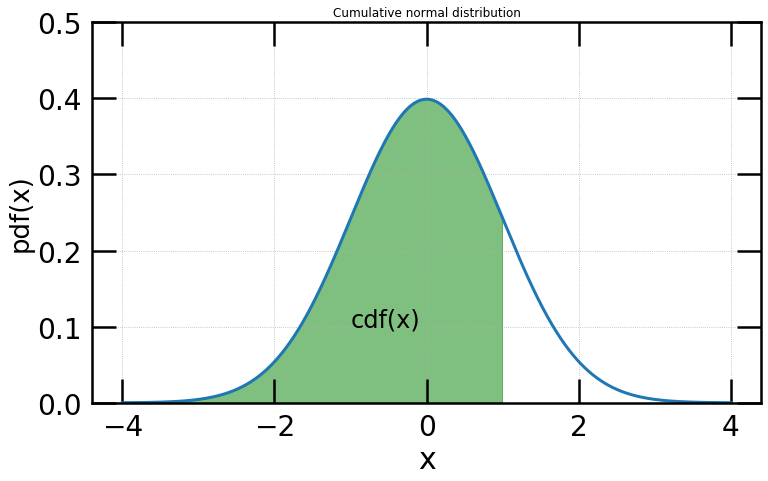

In [15]:
fig, ax = plt.subplots(figsize=(12,7))
# for distribution curve
x= np.arange(-4,4,0.001)

ax.plot(x, stats.norm.pdf(x),lw=3)
ax.set_title("Cumulative normal distribution")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)',fontsize=26)
ax.grid(linestyle='dotted')

# for fill_between
px=np.arange(-4,1,0.01)

ax.set_ylim(0,0.5)
ax.fill_between(px,stats.norm.pdf(px),alpha=0.5, color='g')

# for text
ax.text(-1,0.1,"cdf(x)", fontsize=24)
plt.show()

# Calculating probability of a normal distribution



Suppose we have a Normal distribution: $$X \sim N(5,2^2).$$ 

we can find the probability of $P(X<4)$ using `norm.cdf` with arguments: the location (loc): $\mu$ mean and the scale (scale): $\sigma$ the standard deviation.



In [16]:
mu =5
sigma=2
lessthan4 = stats.norm.cdf(x=4, loc=mu, scale=sigma)
print(lessthan4)

0.3085375387259869


Text(1.5,0.02,'0.31')

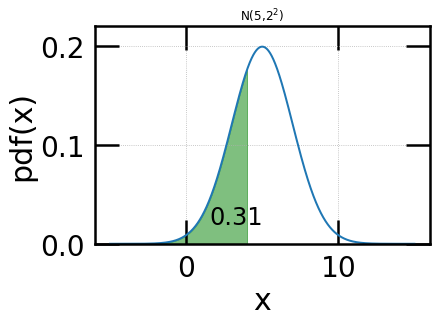

In [17]:

# for the normal distribution curve
x= np.arange(-5,15,0.001)
pdf52 = stats.norm.pdf(x, loc=mu, scale=sigma)

fig, ax = plt.subplots()

ax.plot(x, pdf52)

ax.set_title("N(5,$2^2$)")

ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(linestyle='dotted')

# for fill_between
px=np.arange(-5,4,0.001)
ax.set_ylim(0,0.22)
ax.fill_between(px, stats.norm.pdf(px,loc=mu,scale=sigma),alpha=0.5, color='g')

# for text
ax.text(1.5, 0.02,round(lessthan4,2), fontsize=24)
#plt.show()

### Exercise:
Let's find $P(0.5<X<2)$ with a mean of 1 and a standard deviation of 2.


In [18]:
#norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)

## Group of Gaussian functions

In [44]:
def gauss(x, A,mu,sigma):
    
    import numpy as np
    return A*np.exp( - (x-mu)**2/ 2/sigma**2)  #sigma**2)

def bimodal(x, A1,mu1,sigma1, A2,mu2,sigma2):
    return gauss(x, A1,mu1,sigma1) + gauss(x, A2,mu2,sigma2)

def trimodal(x, A1,mu1,sigma1, A2,mu2,sigma2, A3, mu3,sigma3):
    return gauss(x, A1,mu1,sigma1) + gauss(x, A2,mu2,sigma2) + gauss(x, A3,mu3,sigma3)


In [45]:
x= np.arange(-5,120,0.001)

A1 =60.
mu1=20.
sigma1=4.

A2=40.
mu2=40.
sigma2=8.

A3 = 120.
mu3=70.
sigma3=10.

y1 = gauss(x, A1,mu1,sigma1)
y2 = bimodal(x, A1,mu1, sigma1, A2,mu2,sigma2)
y3 = trimodal(x, A1,mu1,sigma1, A2,mu2,sigma2, A3, mu3,sigma3)

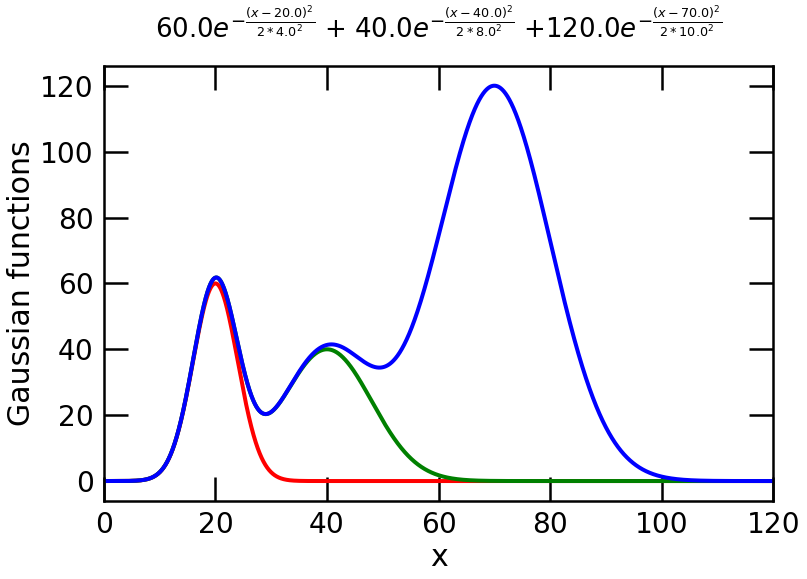

In [46]:
txt = str(A1)+r'$ e^{ - \frac{ (x -'+str(mu1)+')^2 }{ 2 *'+ str(sigma1) +'^2 }  }$ + '  + str(A2)+r'$ e^{ - \frac{ (x -'+str(mu2)+')^2 }{ 2*'+ str(sigma2) +'^2 }  }$ +' + str(A3) +r'$ e^{ - \frac{ (x -'+str(mu3)+')^2 }{ 2 * '+ str(sigma3) +'^2 }  }$'

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y1,'r',lw=4)
ax.plot(x, y2,'g',lw=4)
ax.plot(x, y3,'b',lw=4)

ax.set_title(txt,y=1.05,fontsize=26)
ax.set_xlabel('x')
ax.set_ylabel('Gaussian functions')
ax.set_xlim(0,120)

plt.savefig('PDF_Gausse_example.png',dpi=300)

#  Multivariate Normal Distribution `multivariate_normal`

- mean 
- covariance matrix

$$\rm P(X_1,X_2,...X_n) = P(\mathbf{X}) = \frac{1}{  \sqrt{ (2 \pi)^{n}  det \left[ \mathbf{N} \right]} } exp \left[   -\frac{1}{2} \left(  \mathbf{X} - \boldsymbol{\mu}  \right)^T    \mathbf{N}^{-1}  \left(  \mathbf{X} - \boldsymbol{\mu}  \right) \right]$$


- In two dimensions

$$\rm P(X,Y) = \frac{1}{ 2 \pi \sigma_X \sigma_Y \sqrt{ 1- \rho^2 } }  
exp \left[ - \frac{1}{2(1-\rho^2)} \left(    \frac{(X - \mu_X)^2}{ \sigma_X^2 } -   2 \rho  \frac{(X-\mu_X)(Y-\mu_Y)}{ \sigma_X \sigma_Y }+  \frac{(Y- \mu_Y)^2}{ \sigma_Y^2 }  \right) 
\right]$$

pos shape (100, 100, 2)


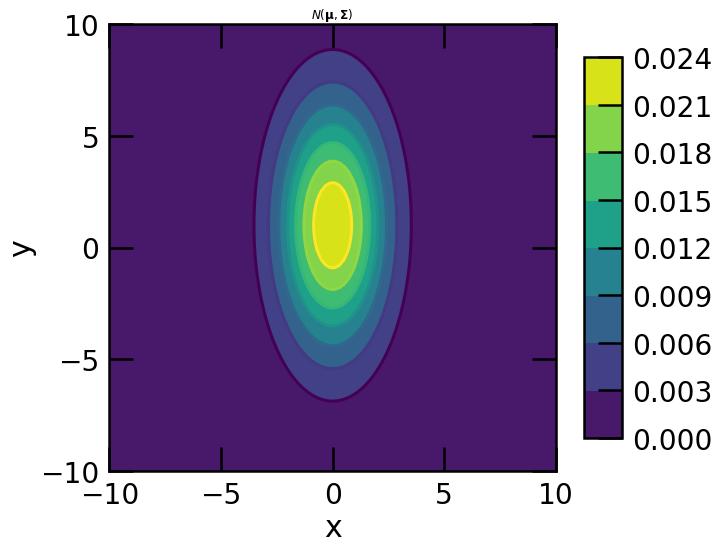

In [22]:
from scipy.stats import multivariate_normal

xmin, xmax, nx = -10, 10, 100
x,y = np.meshgrid( np.linspace(xmin,xmax,nx),np.linspace(xmin,xmax,nx) )   # create 2D array (image)
pos = np.dstack((x,y))               ## This is equivalent to concatenation along the third axis 
                                     ## after 2-D arrays of shape (M,N) have been reshaped to (M,N,2) 
print('pos shape',pos.shape)
mean = np.array([0, 1])              ## array of mean
diag_cov  = np.array([ [3,0],[0,15] ])    ## array of diagonal covariance matrix 

rv = multivariate_normal(mean,diag_cov)   ## 
z = rv.pdf(pos)                      ## Probability density function 


## ====== plot 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,aspect='equal')

ax.contour(x,y,z, linewidths=3) #, levels=14, colors='b')
cont = ax.contourf(x,y,z)

fig.colorbar(cont, shrink=0.7 , aspect=10)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'$N(\mathbf{\mu}, \mathbf{\Sigma})$')

#ax.set_title('pdf')

#ax = fig.add_subplot(122,aspect='equal')
plt.savefig('PDF_multivariate_normal.png',dpi=300)

Text(0.5,1,'pdf')

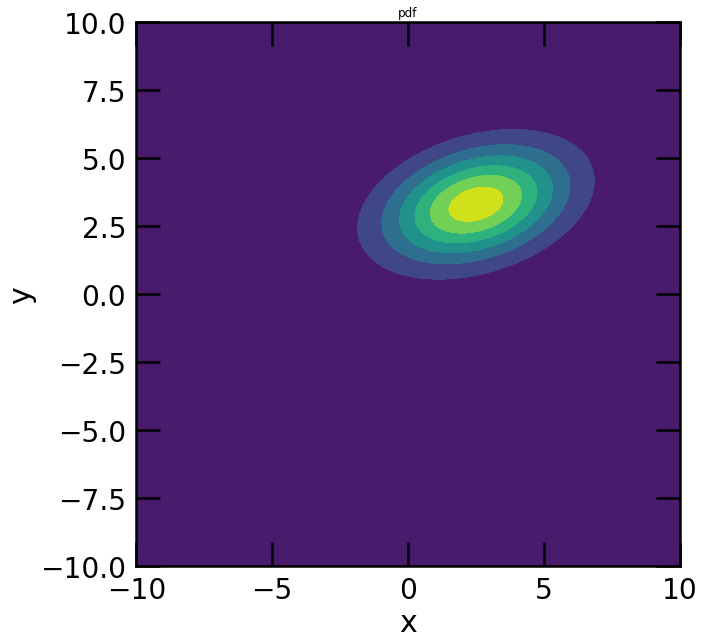

In [23]:
x, y = np.meshgrid( np.linspace(-10,10,100 ), np.linspace(-10,10,100 )) 
pos = np.dstack( (x, y)) 

mean = np.array([2.5, 3.3]) 
cov = np.array([[5.0,1.0 ],[1.0, 2.0 ]]) 

z = stats.multivariate_normal(mean, cov ).pdf(pos)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, aspect='equal') 
ax.contourf(x,y,z) 
ax.set_xlim(-10,10) 
ax.set_ylim(-10,10) 
ax.set_xlabel('x') 
ax.set_ylabel('y') 
ax.set_title('pdf' )

 It is better to see in 3D
 
 ### Bivariate case


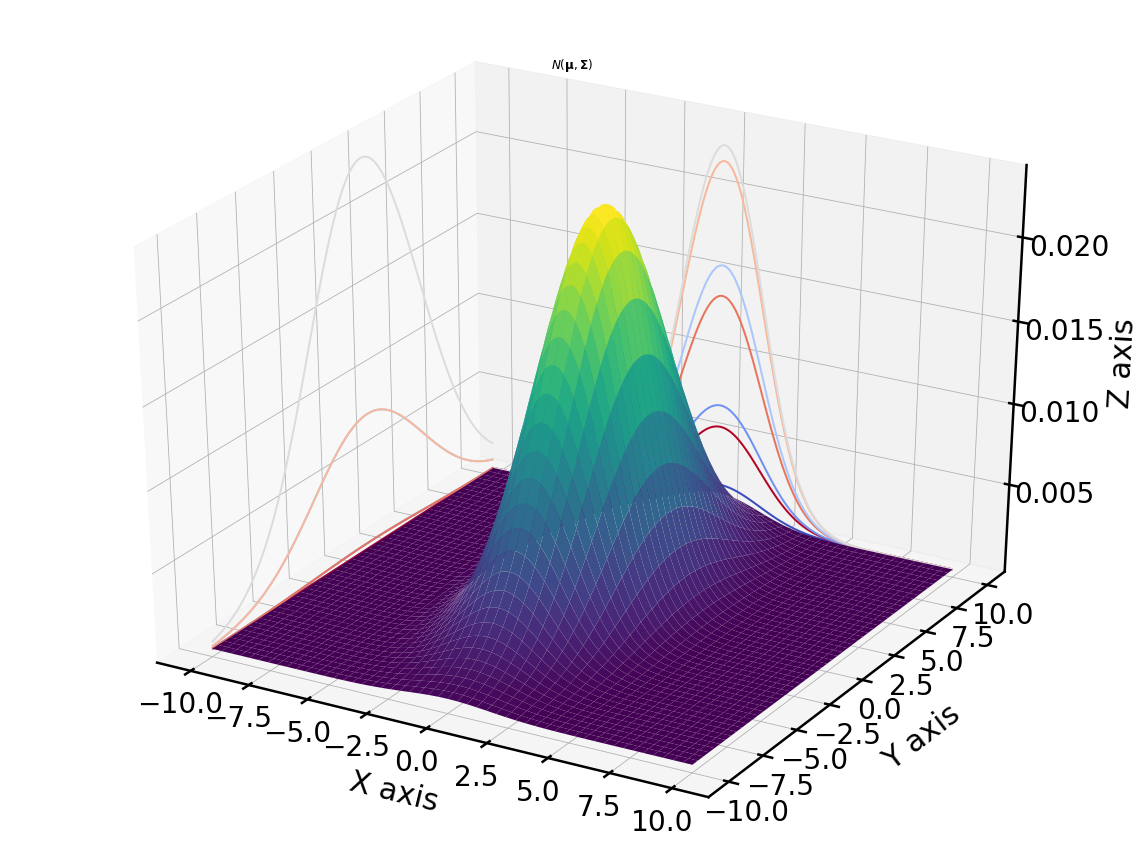

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

xmin, xmax, nx = -10, 10, 1000

# Create grid and multivariate normal
x = np.linspace(xmin,xmax,nx)
y = np.linspace(xmin,xmax,nx)
X, Y = np.meshgrid(x,y)

pos = np.empty(X.shape + (2,) )
pos[:, :, 0] = X 
pos[:, :, 1] = Y

# pos = np.dstack((x,y))  a short command
Z = rv.pdf(pos)

# Create a frozen RV object
mu_x = 0
variance_x = 3
mu_y = 1
variance_y = 15

rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])   # Random Variates

#mean = np.array([0, 1])
#cov  = np.array([[3,0],[0,15]])
#rv = multivariate_normal(mean,cov)

# Make a 3D plot
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot_surface(X, Y, Z ,cmap='viridis', linewidth=1.0)

#cset = ax.contour(X, Y, Z, zdir='z', offset=0.05, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-10, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=10, cmap=matplotlib.cm.coolwarm)

## figure title
ax.set_title(r'$N(\mathbf{\mu}, \mathbf{\Sigma})$')

## Title on axis
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# adjusting padding between axis numbers and axis label
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 35
ax.zaxis.labelpad = 45


# distance between axis and the axis numbers
ax.tick_params(axis='z', which='major', pad=20)
ax.tick_params(axis='y', which='major', pad=8)
ax.tick_params(axis='x', which='major', pad=8)

fig.tight_layout() 

plt.savefig('PDF_multivariate_normal_3D.png',dpi=300)

In [25]:
#multivariate_normal?

In [26]:
#np.meshgrid?

# Exercise (Home Work): 

Form groups of 2 students, present about Center limit theorem and Law of Larger Number less than 10 slides. The content should cover:
- Theory (associated with Normal distribution)
- Examples/Applications
- Jupiter Notebook visualization

---
# 4. Uniform distribution

$$ f(X) =  \frac{1}{b-a} \quad , \quad  X \in [a,b]   
$$

$$f(X) = 0 \quad \rm otherwise$$

- Expectation: $\mu= \frac{a+b}{2}$
- Variance: $Var(X) = \frac{(b-a)^2}{12}$

In the standard form, the distribution is uniform on `[0, 1]`. Using the parameters loc and scale, one obtains the uniform distribution on `[loc, loc + scale]`.

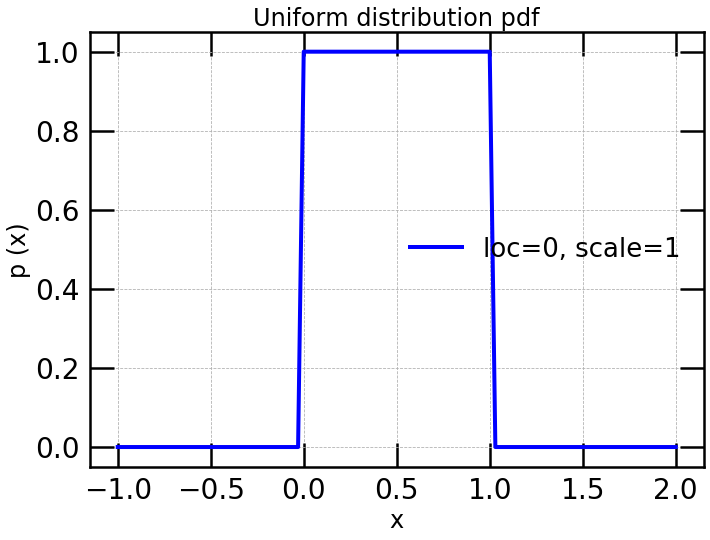

In [27]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot( 111 ) 
x  =  np.linspace( - 1, 2, 100 ) 

ax.plot( x, stats.uniform.pdf( x, loc = 0,  scale = 1 ), label = 'loc=0, scale=1',lw=4 , color='blue') 

ax.set_xlabel( 'x',fontsize=24 ) 
ax.set_ylabel( 'p (x)', fontsize=24 ) 
#ax.set_ylim( 0 , 1.1 ) 
ax.grid( linestyle='--' ) 
ax.legend( loc = 'best' , frameon = False ) 
ax.set_title( 'Uniform distribution pdf',fontsize=24 )
plt.savefig('PDF_uniform.png',dpi=300)

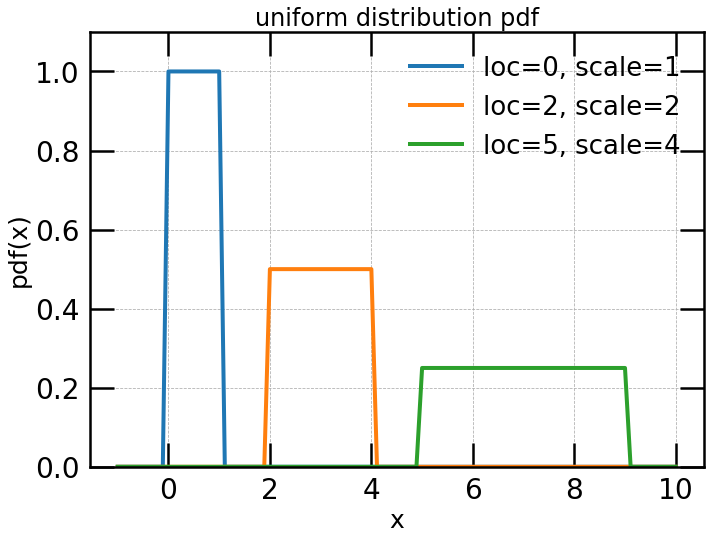

In [28]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)

x = np.linspace(-1,10,100)

ax.plot(x,stats.uniform.pdf(x,loc=0, scale=1), label='loc=0, scale=1',lw=4)
ax.plot(x,stats.uniform.pdf(x,loc=2, scale=2), label='loc=2, scale=2',lw=4)
ax.plot(x,stats.uniform.pdf(x,loc=5, scale=4), label='loc=5, scale=4',lw=4)

ax.set_xlabel('x',fontsize=25)
ax.set_ylabel('pdf(x)', fontsize=25)
ax.set_ylim(0,1.1)
ax.grid(linestyle='--')
ax.legend(loc='best',frameon=False)
ax.set_title('uniform distribution pdf', fontsize=24)
plt.savefig('PDF_uniform_3loc.png',dpi=300)

---
# 5. Gamma distribution

- Model the variables that are always positive $x \in [0,\infty]$
 
$$f(x| a, b) = \frac{ b^a}{\Gamma (a)} x^{a-1} e^{-bx}$$

- **The exponential distribution, Erlang distribution, and chi-square distribution are related and special cases of the gamma distribution.**

- Mean: $E(x) = \frac{a}{b}$ 
- Variance: $Var(x) = \frac{a}{b^2}$

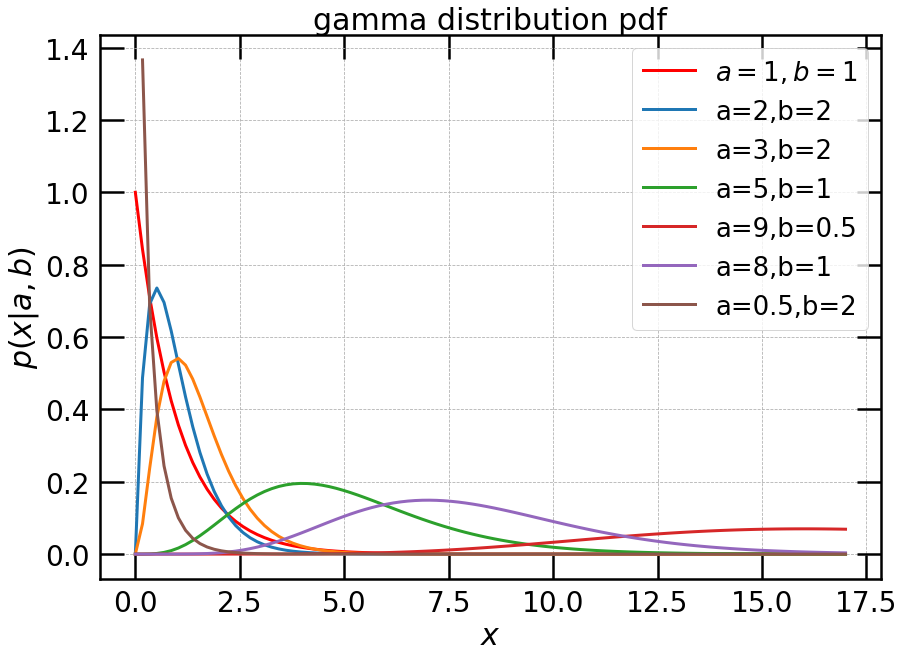

In [29]:
import  matplotlib.pyplot  as  plt 
from  scipy.stats  import  gamma 
import  numpy  as  np 

x = np.linspace (0, 17, 100 ) 


fig = plt.figure(figsize=(14,10))
axes = fig.add_subplot(111)

a = 1.0 
b = 1.0

axes.plot(x,gamma.pdf(x, a, scale=1./b),'r-',lw=3,alpha=1,label='$a=%.0f,b=%.0f $'%(a,b)  )
axes.plot(x,gamma.pdf(x, 2., scale=1./2.),lw=3,label='a=2,b=2') 
axes.plot(x,gamma.pdf(x, 3., scale=1./2.),lw=3,label='a=3,b=2') 
axes.plot(x,gamma.pdf(x, 5., scale=1./1.),lw=3,label='a=5,b=1') 
#axes.plot(x,gamma.pdf(x, 5, scale=1./2.),lw=3,label='a=5,b=2') 
axes.plot(x,gamma.pdf(x, 9, scale=1./0.5),lw=3,label='a=9,b=0.5') 
axes.plot(x,gamma.pdf(x, 8, scale=1./1.),lw=3,label='a=8,b=1') 
axes.plot(x,gamma.pdf(x, 0.5, scale=1./2.),lw=3,label='a=0.5,b=2') 

axes.set_xlabel('$ x $',fontsize=30)
axes.set_ylabel('$p(x|a,b)$',fontsize=30) 
axes.set_title('gamma distribution pdf',fontsize=30 ) 
axes.grid(linestyle='--') 
axes.legend()
plt.savefig('PDF_gamma.png',dpi=300)

## Vary the shape parameter $a$

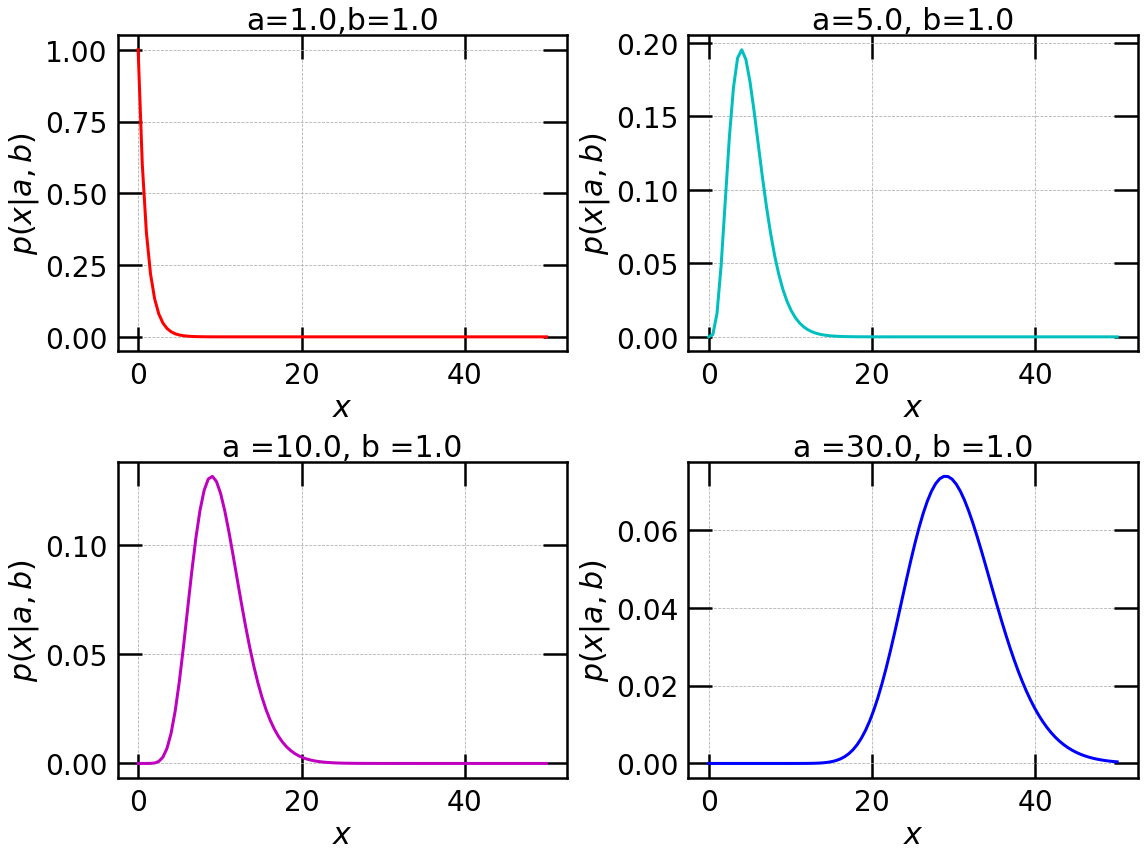

In [30]:
x = np.linspace (0, 50, 100 ) 
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,12 )) 

a = 1.0 
b = 1.0

axes[0,0].plot(x,gamma.pdf(x, a, scale=1./b),'r-',lw=3,alpha=1,label='$a=%.1f,b=%.1f $'%(a,b)  ) 
axes[0,0].set_xlabel('$ x $',fontsize=30)
axes[0,0].set_ylabel('$p(x|a,b)$',fontsize=30) 
axes[0,0].set_title('a=%.1f,b=%.1f'%(a,b),fontsize=30 ) 
axes[0,0].grid(linestyle='--') 

a  =  5.0 
axes[0,1].plot(x,gamma.pdf(x,a,scale=1./b),'c-',lw=3,alpha=1,label='$a=%.1f,b=%.1f$'%(a,b) ) 
axes[0,1].set_xlabel('$ x $',fontsize=30 ) 
axes[0,1].set_ylabel ('$p(x|a,b)$',fontsize=30 ) 
axes[0,1].set_title('a=%.1f, b=%.1f'%(a,b),fontsize=30) 
axes[0,1].grid(linestyle='--') 
a  =  10.0 
axes[1,0].plot(x,gamma.pdf(x,a,scale=1./b),'m-',lw=3,alpha=1,label='$a=%.1f,b=%.1f$'%(a,b) ) 
axes[1,0].set_xlabel('$x$',fontsize=30) 
axes[1,0].set_ylabel('$p(x|a,b)$',fontsize=30) 
axes[1,0].set_title('a =%.1f, b =%.1f'%(a,b),fontsize=30) 
axes[1,0].grid(linestyle='--') 
a  =  30.0 
axes[1,1].plot(x,gamma.pdf(x,a,scale= 1./b),'b-',lw=3,alpha=1,label='$a=%.1f,b=%.1f$'%(a,b)) 
axes[1,1].set_xlabel ('$ x $',fontsize=30) 
axes[1,1].set_ylabel ('$ p(x|a, b)$',fontsize=30) 
axes[1,1].set_title('a =%.1f, b =%.1f'%(a,b),fontsize=30) 
axes[1,1].grid(linestyle='--' )

plt.tight_layout()

plt.savefig('PDF_gamma_change_a.png',dpi=300)

## Vary the rate parameter $b$

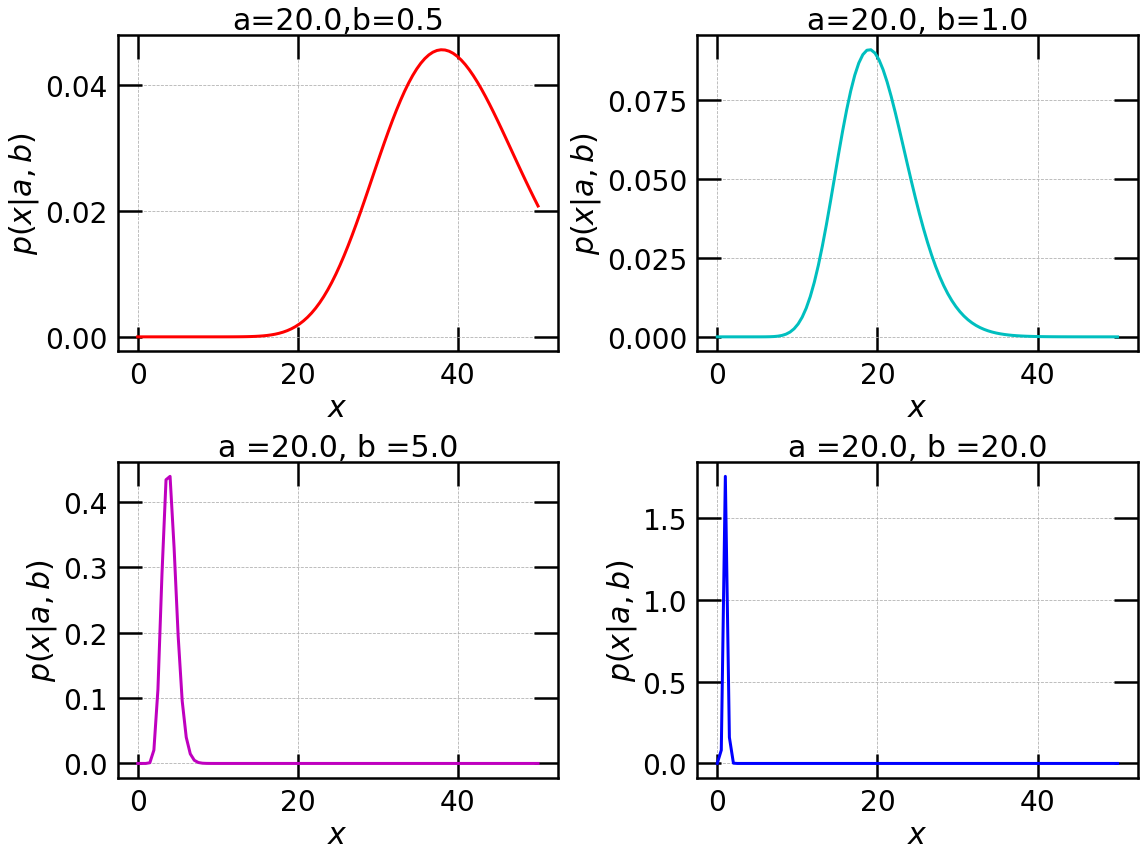

In [31]:
x = np.linspace (0, 50, 100 ) 
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,12 )) 

a = 20.0 
b = 0.5

axes[0,0].plot(x,gamma.pdf(x, a, scale=1./b),'r-',lw=3,alpha=1,label='$a=%.1f,b=%.1f $'%(a,b)  ) 
axes[0,0].set_xlabel('$ x $',fontsize=30)
axes[0,0].set_ylabel('$p(x|a,b)$',fontsize=30) 
axes[0,0].set_title('a=%.1f,b=%.1f'%(a,b),fontsize=30 ) 
axes[0,0].grid(linestyle='--') 

b  =  1.0 
axes[0,1].plot(x,gamma.pdf(x,a,scale=1./b),'c-',lw=3,alpha=1,label='$a=%.1f,b=%.1f$'%(a,b) ) 
axes[0,1].set_xlabel('$ x $',fontsize=30 ) 
axes[0,1].set_ylabel ('$p(x|a,b)$',fontsize=30 ) 
axes[0,1].set_title('a=%.1f, b=%.1f'%(a,b),fontsize=30) 
axes[0,1].grid(linestyle='--') 

b  =  5.0 
axes[1,0].plot(x,gamma.pdf(x,a,scale=1./b),'m-',lw=3,alpha=1,label='$a=%.1f,b=%.1f$'%(a,b) ) 
axes[1,0].set_xlabel('$x$',fontsize=30) 
axes[1,0].set_ylabel('$p(x|a,b)$',fontsize=30) 
axes[1,0].set_title('a =%.1f, b =%.1f'%(a,b),fontsize=30) 
axes[1,0].grid(linestyle='--') 

b  =  20.0 
axes[1,1].plot(x,gamma.pdf(x,a,scale= 1./b),'b-',lw=3,alpha=1,label='$a=%.1f,b=%.1f$'%(a,b)) 
axes[1,1].set_xlabel ('$ x $',fontsize=30) 
axes[1,1].set_ylabel ('$ p(x|a, b)$',fontsize=30) 
axes[1,1].set_title('a =%.1f, b =%.1f'%(a,b),fontsize=30) 
axes[1,1].grid(linestyle='--')

plt.tight_layout()

plt.savefig('PDF_gamma_change_b.png',dpi=300)

---
# 6. Exponential 
- Model the time decay events

$$f(x) = \tau e^{- \tau x}$$

- Mean: $E(x) = \frac{1}{\tau}$
- Variance: $Var(x) = \frac{1}{\tau^2}$

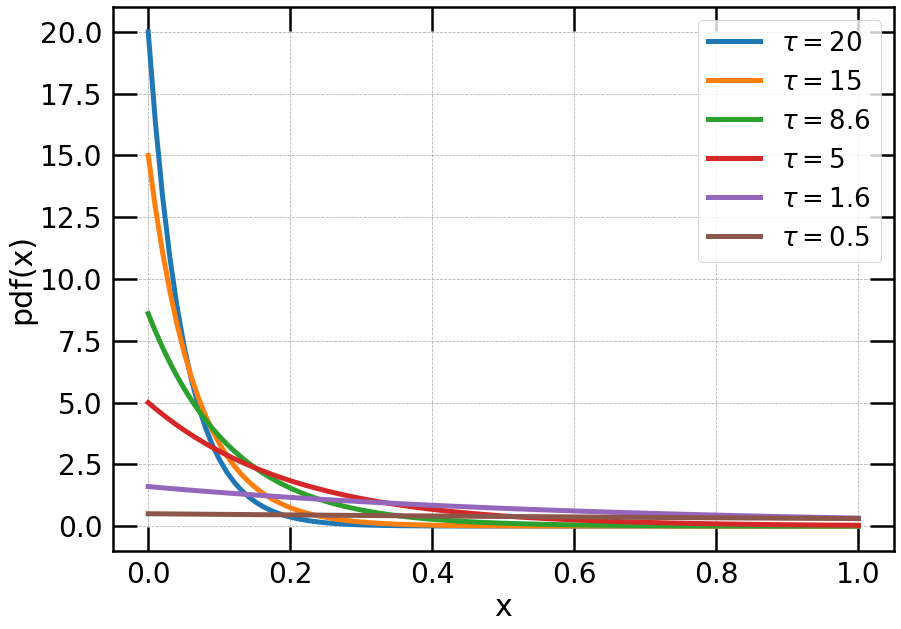

In [32]:
def pdf(tau, x):
    return tau * np.exp(-tau * x)

fig = plt.figure(figsize=(14,10))
#axes = fig.add_subplot(111)

def plot_pdf(tau):
    x = np.linspace(0,1,100)
    y = [pdf(tau, xi) for xi in x]
    plt.plot(x, y, label=r"$\tau=%g$" %tau, lw=5)

[plot_pdf(tau) for tau in [20, 15, 8.6, 5, 1.6, 0.5]]


plt.xlabel("x",fontsize=30)
plt.ylabel("pdf(x)",fontsize=30)
plt.legend()
plt.grid(linestyle='--')
plt.savefig('PDF_exponential.png',dpi=300)


---
# 7. Student's Distribution 

We estimate the mean of a normal distribution where the sample size is small and the standard deviation is unknown

$$f(t) = \frac{\Gamma( \frac{\nu + 1}{2} )}{ \sqrt{\nu \pi}  \Gamma (\frac{\nu}{2})} \left( 1+ \frac{t^2}{\nu} \right)^{ - \frac{\nu + 1}{2} }$$

- Mean: $E(t) = 0$
- Variance: $Var(t) = \frac{\nu}{\nu - 2} \quad ;  \nu > 2$

- Except `loc` and `scale`, t distribution takes one important shape parameter: $\nu$ (from: 'degrees of freedom')


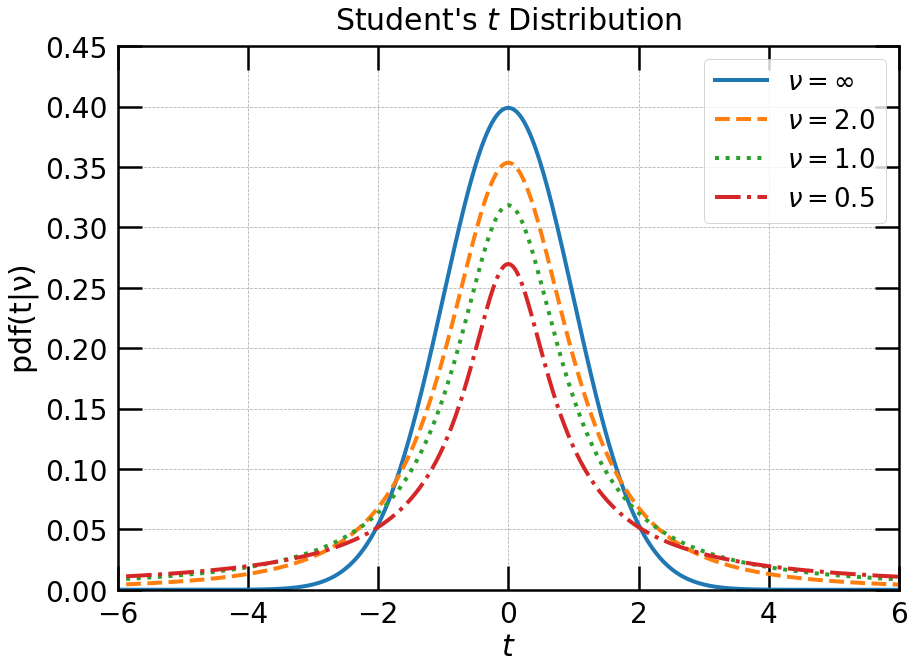

In [33]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

import numpy as np
from  scipy.stats  import  t as student_t
from matplotlib import pyplot as plt

#------------------------------------------------------------
# Define the distribution parameters to be plotted

mu = 0 # equivalent to `loc=0`
nu_values = [1E10, 2, 1, 0.5]

linestyles = ['-', '--', ':', '-.']
t = np.linspace(-10, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(14, 10))

for nu, ls in zip(nu_values, linestyles):
    dist = student_t(nu)

    if nu >= 1E10:
        label = r'$\nu=\infty$'
    else:
        label = r'$\nu=%.1f$'%nu

    plt.plot(t, dist.pdf(t), ls=ls, lw=4, label=label)   #,  c='black'

#pdf(x, df, loc=0, scale=1), we can change this parameters!
#Probability density function.

plt.xlim(-6, 6)
plt.ylim(0.0, 0.45)

plt.xlabel('$t$',fontsize=30)
plt.ylabel(r'$\rm pdf(t| \nu)$',fontsize=30)
plt.title("Student's $t$ Distribution",fontsize=30, y=1.02)

plt.legend()
plt.grid(linestyle='--')

plt.savefig('PDF_t_distribution.png',dpi=300)


In [34]:
#student_t?

---
# 8. chi-square distribution

$$f(x) = \frac{ x^{\frac{k}{2} -1 }  e^{- \frac{x}{2} }    }{ 2^{\frac{k}{2} }  \Gamma ( \frac{k}{2} )}$$

- Mean: $E(x) = k$
- Variance: $Var(x) = 2k$

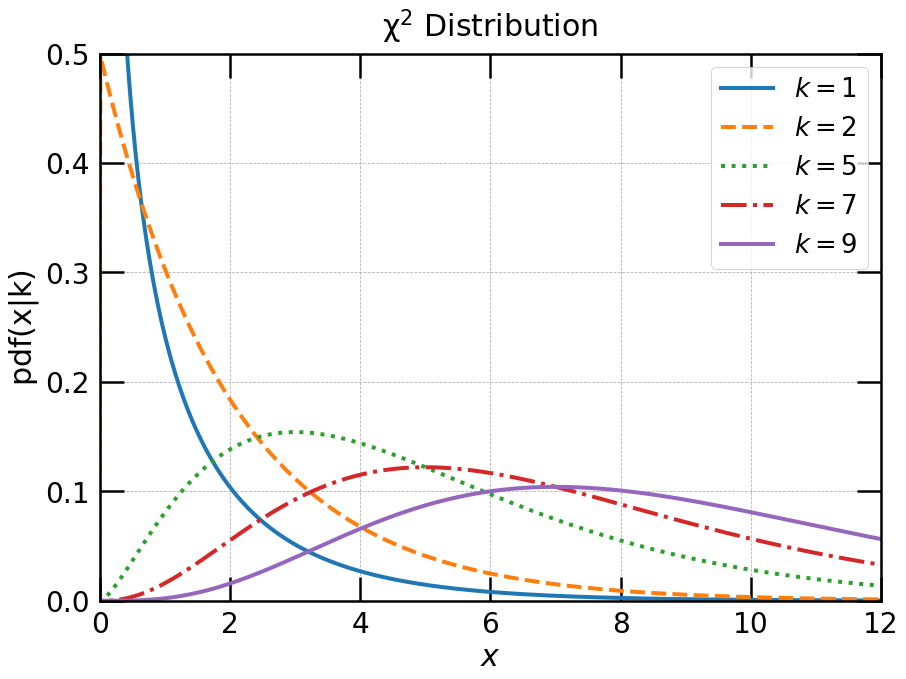

In [35]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import chi2
from matplotlib import pyplot as plt

#------------------------------------------------------------
# Define the distribution parameters to be plotted
k_values = [1, 2, 5, 7, 9]
linestyles = ['-', '--', ':', '-.', '-']

mu = 0
x = np.linspace(-1, 20, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(14, 10))
fig.subplots_adjust(bottom=0.12)

for k, ls in zip(k_values, linestyles):
    dist = chi2(k, mu)
    plt.plot(x, dist.pdf(x), ls=ls, lw=4, label=r'$k=%i$' %k) #, c='black',
             

plt.xlim(0, 12)
plt.ylim(0, 0.5)

plt.xlabel('$x$', fontsize=30)
plt.ylabel(r'$\rm pdf(x|k)$',fontsize=30)
plt.title(r'$\rm \chi^2\ \mathrm{Distribution}$',fontsize=30, y=1.02)

plt.legend()
plt.grid(linestyle='--')

plt.savefig('PDF_chi_distribution.png',dpi=300)


In [36]:
#chi2?

# References

- https://qiita.com/supersaiakujin/items/71540d1ecd60ced65add
- https://stackoverflow.com/questions/38698277/plot-normal-distribution-in-3d